In [2]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, DoubleType

spark = SparkSession.builder.getOrCreate()

# Schema
schema = StructType([
    StructField("order_id", StringType()),
    StructField("region", StringType()),
    StructField("category", StringType()),
    StructField("quantity", IntegerType()),
    StructField("price", IntegerType())
])

# Inline data
data = [
    ("O001", "South", "Electronics", 3, 15000),
    ("O002", "North", "Clothing", 5, 2000),
    ("O003", "East", "Furniture", 2, 12000),
    ("O004", "West", "Electronics", 1, 18000),
    ("O005", "North", "Furniture", 4, 9000),
    ("O006", "South", "Clothing", 6, 2500),
    ("O007", "East", "Electronics", 2, 17000)
]

df = spark.createDataFrame(data, schema)
df.show()


+--------+------+-----------+--------+-----+
|order_id|region|   category|quantity|price|
+--------+------+-----------+--------+-----+
|    O001| South|Electronics|       3|15000|
|    O002| North|   Clothing|       5| 2000|
|    O003|  East|  Furniture|       2|12000|
|    O004|  West|Electronics|       1|18000|
|    O005| North|  Furniture|       4| 9000|
|    O006| South|   Clothing|       6| 2500|
|    O007|  East|Electronics|       2|17000|
+--------+------+-----------+--------+-----+



In [4]:
from pyspark.sql.functions import col, sum as _sum, avg, count

# Total revenue column
df = df.withColumn("revenue", col("quantity") * col("price"))

# Summary by category
category_summary = df.groupBy("category").agg(
    _sum("quantity").alias("total_quantity"),
    _sum("revenue").alias("total_revenue"),
    avg("revenue").alias("avg_order_value")
)
category_summary.show()

# Summary by region
region_summary = df.groupBy("region").agg(
    count("*").alias("total_orders"),
    _sum("revenue").alias("total_revenue")
)
region_summary.show()


+-----------+--------------+-------------+------------------+
|   category|total_quantity|total_revenue|   avg_order_value|
+-----------+--------------+-------------+------------------+
|Electronics|             6|        97000|32333.333333333332|
|   Clothing|            11|        25000|           12500.0|
|  Furniture|             6|        60000|           30000.0|
+-----------+--------------+-------------+------------------+

+------+------------+-------------+
|region|total_orders|total_revenue|
+------+------------+-------------+
| South|           2|        60000|
|  East|           2|        58000|
| North|           2|        46000|
|  West|           1|        18000|
+------+------------+-------------+



In [5]:
display(category_summary)
display(region_summary)

DataFrame[category: string, total_quantity: bigint, total_revenue: bigint, avg_order_value: double]

DataFrame[region: string, total_orders: bigint, total_revenue: bigint]

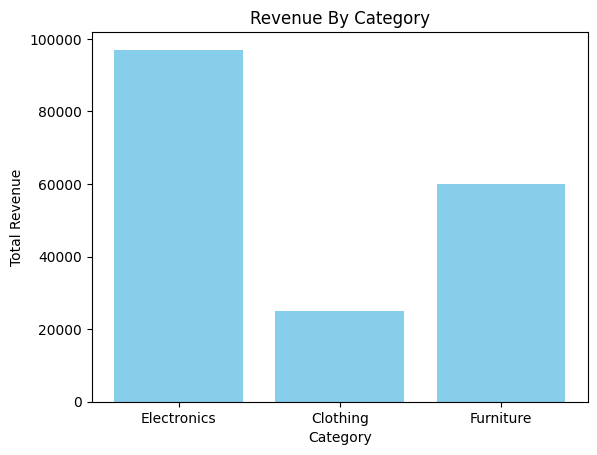

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert to Pandas
pdf = category_summary.toPandas()

# Plot
plt.bar(pdf['category'], pdf['total_revenue'], color='skyblue')
plt.xlabel("Category")
plt.ylabel("Total Revenue")
plt.title("Revenue By Category")
plt.show()


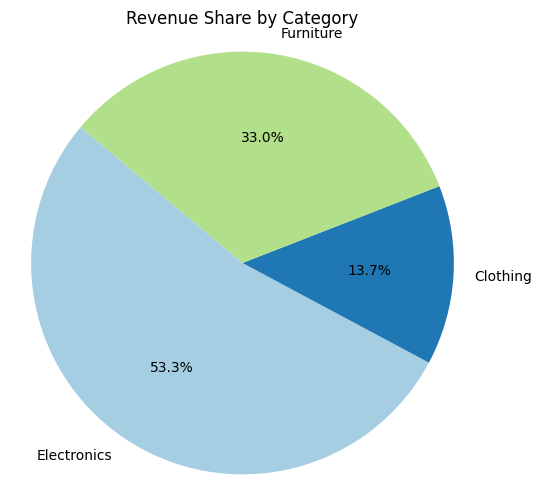

In [10]:
import matplotlib.pyplot as plt

# Convert Spark DataFrame to Pandas
pdf = category_summary.toPandas()

# Create Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(
    pdf['total_revenue'],
    labels=pdf['category'],
    autopct='%1.1f%%',       # Show percentages
    startangle=140,          # Rotate chart start
    colors=plt.cm.Paired.colors  # Nice color palette
)

plt.title("Revenue Share by Category")
plt.axis('equal')  # Keep circle shape
plt.show()


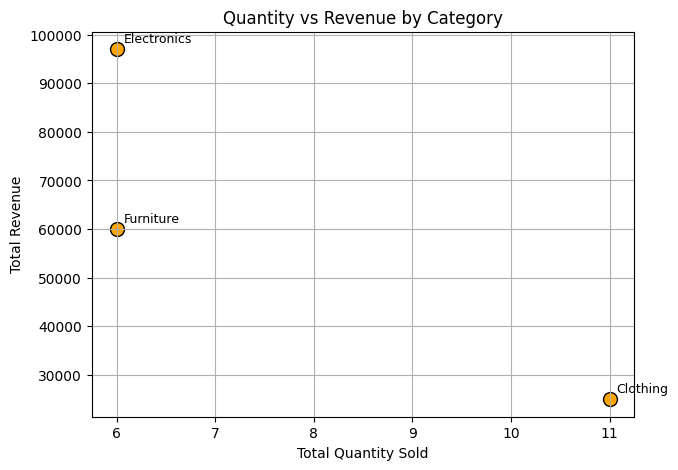

In [11]:
import matplotlib.pyplot as plt

# Convert Spark DataFrame to Pandas
pdf = category_summary.toPandas()

# Scatter Plot
plt.figure(figsize=(7, 5))
plt.scatter(
    pdf['total_quantity'],
    pdf['total_revenue'],
    color='orange',
    s=100, edgecolors='black'
)

# Add labels to each point
for i, txt in enumerate(pdf['category']):
    plt.annotate(txt, (pdf['total_quantity'][i], pdf['total_revenue'][i]), fontsize=9, xytext=(5,5), textcoords='offset points')

plt.xlabel("Total Quantity Sold")
plt.ylabel("Total Revenue")
plt.title("Quantity vs Revenue by Category")
plt.grid(True)
plt.show()
